In [63]:
scipy.__version__

'1.2.1'

In [11]:
pip install --upgrade scipy

Requirement already up-to-date: scipy in c:\users\91758\appdata\local\continuum\anaconda3\lib\site-packages (1.4.1)
Note: you may need to restart the kernel to use updated packages.


In [10]:
scipy.__version__

'1.4.1'

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
import imageio 
from scipy import misc
from sklearn.metrics import accuracy_score
import tensorflow as tf
import keras
%pylab inline
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

Populating the interactive namespace from numpy and matplotlib


In [41]:
root_dir = os.path.abspath('../..')
data_dir = os.path.join(root_dir, '91758')
sub_dir = os.path.join(data_dir, 'Downloads')

In [42]:
# check for existence
os.path.exists(root_dir)
os.path.exists(data_dir)

True

In [43]:
train = pd.read_csv('C:\\Users\\91758\\Downloads\\Identify_the_Digits\\train.csv')
test = pd.read_csv('C:\\Users\\91758\\Downloads\\Identify_the_Digits\\test.csv')

In [44]:
train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [45]:
seed = 3
rng = np.random.RandomState(seed)

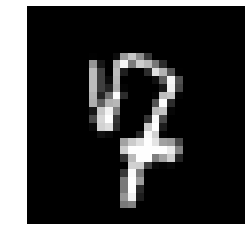

In [46]:
img_name = rng.choice(train.filename)
filepath = os.path.join(data_dir,'Downloads', 'Identify_the_Digits', 'train_digit','train', img_name)

img = imread(filepath)

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [47]:
img

array([[[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       ...,

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0.

In [48]:
temp = []
for img_name in train.filename:
    image_path = os.path.join(data_dir,'Downloads', 'Identify_the_Digits','train_digit','train', img_name)
    img = imread(image_path)
    img = img.flatten().astype('float32')
    temp.append(img)

train_x= np.stack(temp)

In [49]:
train_x.shape

(49000, 3136)

In [50]:
#num_pixels= train_x.shape[1]*train_x.shape[2]

In [51]:
#train_x = train_x.reshape(-1,784).astype('float32')
train_x = train_x/255 

train_y = keras.utils.np_utils.to_categorical(train.label.values)

In [52]:
train_x.shape

(49000, 3136)

In [53]:
train_y.shape

(49000, 10)

In [54]:
split_size = int(train_x.shape[0]*0.7)

train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train_y[:split_size], train_y[split_size:]

In [55]:
train_x.shape

(34300, 3136)

In [56]:
train_y.shape

(34300, 10)

In [57]:
val_y.shape

(14700, 10)

#### Artifical Neural Network

In [35]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(train_x.shape[1], input_dim=train_x.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(train_y.shape[1], kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [36]:
model = baseline_model()
# Fit the model
model.fit(train_x, train_y, epochs=10, batch_size=32, verbose=2)
# Final evaluation of the model
scores = model.evaluate(val_x, val_y, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
 - 229s - loss: 0.5812 - accuracy: 0.8419
Epoch 2/10
 - 224s - loss: 0.3008 - accuracy: 0.9115
Epoch 3/10
 - 224s - loss: 0.2493 - accuracy: 0.9271
Epoch 4/10
 - 226s - loss: 0.2050 - accuracy: 0.9411
Epoch 5/10
 - 224s - loss: 0.1705 - accuracy: 0.9499
Epoch 6/10
 - 224s - loss: 0.1447 - accuracy: 0.9573
Epoch 7/10
 - 223s - loss: 0.1236 - accuracy: 0.9634
Epoch 8/10
 - 224s - loss: 0.1080 - accuracy: 0.9670
Epoch 9/10
 - 223s - loss: 0.0939 - accuracy: 0.9719
Epoch 10/10
 - 225s - loss: 0.0826 - accuracy: 0.9752
Baseline Error: 3.73%


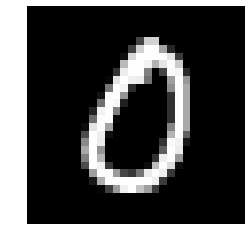

In [58]:
img_name = rng.choice(test.filename)
filepath = os.path.join(data_dir,'Downloads', 'Identify_the_Digits', 'test_Digit', img_name)

img = imread(filepath)

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [59]:
temp = []
for img_name in test.filename:
    image_path = os.path.join(data_dir,'Downloads', 'Identify_The_Digits' , 'test_Digit', img_name)
    img = imread(image_path)
    img = img.flatten().astype('float32')
    temp.append(img)
    
test_x = np.stack(temp)

test_x /= 255.0
#test_x = test_x.reshape(-1, 784).astype('float32')

In [60]:
pred = model.predict_classes(test_x)

In [64]:
pred= pd.Series(pred)
pred[:5]

0    4
1    0
2    9
3    7
4    9
dtype: int64

Prediction is:  7


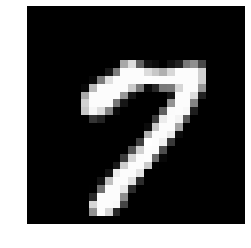

In [70]:
img_name = rng.choice(test.filename)
filepath = os.path.join(data_dir, 'Downloads','Identify_the_Digits', 'test_Digit', img_name)

img = imread(filepath)
#img= img.flatten()

test_index = int(img_name.split('.')[0]) - train.shape[0]

print("Prediction is: ", pred[test_index])

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [71]:
a= pd.concat([test['filename'], pred], axis=1)
a.columns=['filename','label']

In [72]:
a.to_csv(os.path.join(data_dir, 'Downloads','Identify_The_Digits','annsolution.csv'), index=False)